# Data Cleaning

In [313]:
import os

save_path = "./results/EDA Visuals"
os.makedirs(save_path, exist_ok=True)

In [314]:
import pandas as pd


In [315]:
df1= pd.read_csv("./data/raw/Loan_Default.csv")

In [316]:
df1.shape 


(148670, 34)

In [317]:
df1.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [318]:
df1.duplicated().sum()

0

In [319]:
# Check Any Missing Values in DataSet
df1.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [320]:
df1['loan_limit'].value_counts()


loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64

In [321]:
df1["loan_limit"] = df1["loan_limit"].fillna("Unknown")


In [322]:
df1['loan_limit'].value_counts()

loan_limit
cf         135348
ncf          9978
Unknown      3344
Name: count, dtype: int64

In [323]:
df1.isna().sum()


ID                               0
year                             0
loan_limit                       0
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [324]:
# 1. Drop rows where age is NaN
df1 = df1.dropna(subset=["age"])


# 2. For all other categorical columns, fill NaN with "Unknown"
for col in df1.select_dtypes(include=["object"]).columns:
    if col != "age":   # skip age
        df1[col] = df1[col].fillna("Unknown")

In [325]:
# Loop through all categorical (object) columns and show category counts
for col in df1.select_dtypes(include=["object"]).columns:
    print(f"\nColumn: {col}")
    print(df1[col].value_counts(dropna=False))


Column: loan_limit
loan_limit
cf         135330
ncf          9808
Unknown      3332
Name: count, dtype: int64

Column: Gender
Gender
Male                 42346
Joint                41399
Sex Not Available    37459
Female               27266
Name: count, dtype: int64

Column: approv_in_adv
approv_in_adv
nopre      124422
pre         23140
Unknown       908
Name: count, dtype: int64

Column: loan_type
loan_type
type1    113137
type2     20603
type3     14730
Name: count, dtype: int64

Column: loan_purpose
loan_purpose
p3         55871
p4         54766
p1         34437
p2          3270
Unknown      126
Name: count, dtype: int64

Column: Credit_Worthiness
Credit_Worthiness
l1    142144
l2      6326
Name: count, dtype: int64

Column: open_credit
open_credit
nopc    147914
opc        556
Name: count, dtype: int64

Column: business_or_commercial
business_or_commercial
nob/c    127867
b/c       20603
Name: count, dtype: int64

Column: Neg_ammortization
Neg_ammortization
not_neg    133349
neg_

In [326]:
# Loop through all Numerical (object) columns and show category counts
for col in df1.select_dtypes(include=["int64", "float64"]).columns:
    print(f"\nColumn: {col}")
    print(df1[col].value_counts(dropna=False))


Column: ID
ID
24890     1
124054    1
124002    1
124003    1
124004    1
         ..
74451     1
74452     1
74453     1
74454     1
173559    1
Name: count, Length: 148470, dtype: int64

Column: year
year
2019    148470
Name: count, dtype: int64

Column: loan_amount
loan_amount
206500     4604
256500     4072
156500     3960
226500     3938
486500     3819
           ... 
2206500       1
1746500       1
2396500       1
3576500       1
1956500       1
Name: count, Length: 211, dtype: int64

Column: rate_of_interest
rate_of_interest
NaN      36439
3.990    14433
3.625     8798
3.875     8577
3.750     8447
         ...  
5.300        1
7.750        1
7.375        1
4.700        1
2.700        1
Name: count, Length: 131, dtype: int64

Column: Interest_rate_spread
Interest_rate_spread
 NaN       36439
-0.0280       77
-0.0380       64
-0.0230       60
-0.1730       56
           ...  
 1.6577        1
 0.9592        1
-0.4142        1
-0.5893        1
-0.3247        1
Name: count, Lengt

In [327]:
for col in df1.select_dtypes(include=["int64", "float64"]).columns:
    df1[col] = df1[col].fillna(df1[col].median())

In [328]:
## After Filling Null Values of Categorical and Numerical Columns
df1.isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [329]:
df1['Status'].value_counts()

Status
0    112031
1     36439
Name: count, dtype: int64

# Outliars Handling

In [330]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

In [331]:
df2_outlier=df1.copy()
def winsorize_iqr(data, exclude_cols=None):
    df_winsor = df2_outlier.copy()
    if exclude_cols is None:
        exclude_cols = []
    
    # Select only numeric columns
    numeric_cols = df_winsor.select_dtypes(include=["int64", "float64"]).columns
    
    # Exclude categorical/binary columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    for col in numeric_cols:
        Q1 = df_winsor[col].quantile(0.25)
        Q3 = df_winsor[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Winsorize
        df_winsor[col] = df_winsor[col].apply(
            lambda x: lower if x < lower else upper if x > upper else x
        )
    
    return df_winsor
    
df_winsorized = winsorize_iqr(df2_outlier, exclude_cols=["Status"])
print(df_winsorized.describe())


                  ID      year    loan_amount  rate_of_interest  \
count  148470.000000  148470.0  148470.000000     148470.000000   
mean    99225.132566    2019.0  327887.620395          4.022851   
std     42918.274684       0.0  168933.023443          0.453433   
min     24890.000000    2019.0   16500.000000          3.000000   
25%     62058.250000    2019.0  196500.000000          3.750000   
50%     99220.500000    2019.0  296500.000000          3.990000   
75%    136394.750000    2019.0  436500.000000          4.250000   
max    173559.000000    2019.0  796500.000000          5.000000   

       Interest_rate_spread  Upfront_charges      term  property_value  \
count         148470.000000    148470.000000  148470.0    1.484700e+05   
mean               0.422463      2877.923296     360.0    4.673674e+05   
std                0.413540      2203.341578       0.0    2.421125e+05   
min               -0.479063         0.000000     360.0    8.000000e+03   
25%                0.18090

In [332]:
df_cleaned3 = df_winsorized     # if you winsorized outliers

# Select numeric columns
numeric_cols = df_cleaned3.select_dtypes(include=["int64", "float64"]).columns

# Loop through each column and save boxplot
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_cleaned3[col])
    plt.title(f'Boxplot of {col} (After Outlier Handling)')
    
    # Save to file
    file_name = f"{col}_boxplot.png"
    plt.savefig(os.path.join(save_path, file_name), bbox_inches="tight")
    plt.close()   # close figure to avoid overlap in loop

In [333]:
df_winsorized['Status'].value_counts()

Status
0    112031
1     36439
Name: count, dtype: int64

In [334]:
df_encoded1=df_winsorized.copy()


In [335]:
df_encoded1.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,75.122549,North,direct,1,39.0
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [336]:
df_cleaned3['Status'].value_counts()


Status
0    112031
1     36439
Name: count, dtype: int64

In [337]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

In [338]:
df2_outlier=df1.copy()
def winsorize_iqr(data, exclude_cols=None):
    df_winsor = df2_outlier.copy()
    if exclude_cols is None:
        exclude_cols = []
    
    # Select only numeric columns
    numeric_cols = df_winsor.select_dtypes(include=["int64", "float64"]).columns
    
    # Exclude categorical/binary columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    for col in numeric_cols:
        Q1 = df_winsor[col].quantile(0.25)
        Q3 = df_winsor[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Winsorize
        df_winsor[col] = df_winsor[col].apply(
            lambda x: lower if x < lower else upper if x > upper else x
        )
    
    return df_winsor
    
df_winsorized = winsorize_iqr(df2_outlier, exclude_cols=["Status"])
print(df_winsorized.describe())


                  ID      year    loan_amount  rate_of_interest  \
count  148470.000000  148470.0  148470.000000     148470.000000   
mean    99225.132566    2019.0  327887.620395          4.022851   
std     42918.274684       0.0  168933.023443          0.453433   
min     24890.000000    2019.0   16500.000000          3.000000   
25%     62058.250000    2019.0  196500.000000          3.750000   
50%     99220.500000    2019.0  296500.000000          3.990000   
75%    136394.750000    2019.0  436500.000000          4.250000   
max    173559.000000    2019.0  796500.000000          5.000000   

       Interest_rate_spread  Upfront_charges      term  property_value  \
count         148470.000000    148470.000000  148470.0    1.484700e+05   
mean               0.422463      2877.923296     360.0    4.673674e+05   
std                0.413540      2203.341578       0.0    2.421125e+05   
min               -0.479063         0.000000     360.0    8.000000e+03   
25%                0.18090

In [339]:
df_cleaned3 = df_winsorized     # if you winsorized outliers

# Select numeric columns
numeric_cols = df_cleaned3.select_dtypes(include=["int64", "float64"]).columns

# Loop through each column and save boxplot
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_cleaned3[col])
    plt.title(f'Boxplot of {col} (After Outlier Handling)')
    
    # Save to file
    file_name = f"{col}_boxplot_after.png"
    plt.savefig(os.path.join(save_path, file_name), bbox_inches="tight")
    plt.close()   # close figure to avoid overlap in loop

In [340]:
df_winsorized['Status'].value_counts()

Status
0    112031
1     36439
Name: count, dtype: int64

In [341]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

In [342]:
df_encoded1 = df_winsorized.copy()

In [343]:
for col in df_encoded1.columns:
    print(f"\nColumn: {col}")
    print(df_encoded1[col].unique())



Column: ID
[ 24890  24891  24892 ... 173557 173558 173559]

Column: year
[2019]

Column: loan_limit
['cf' 'Unknown' 'ncf']

Column: Gender
['Sex Not Available' 'Male' 'Joint' 'Female']

Column: approv_in_adv
['nopre' 'pre' 'Unknown']

Column: loan_type
['type1' 'type2' 'type3']

Column: loan_purpose
['p1' 'p4' 'p3' 'p2' 'Unknown']

Column: Credit_Worthiness
['l1' 'l2']

Column: open_credit
['nopc' 'opc']

Column: business_or_commercial
['nob/c' 'b/c']

Column: loan_amount
[116500. 206500. 406500. 456500. 696500. 706500. 346500. 266500. 376500.
 436500. 136500. 466500. 226500.  76500. 356500. 156500. 586500. 306500.
 316500. 336500. 426500. 476500. 196500. 186500. 246500. 216500. 506500.
 656500. 256500. 396500. 166500. 236500. 796500. 416500. 386500. 596500.
 606500.  86500. 286500. 146500. 446500. 636500. 486500. 326500.  56500.
 496500. 106500. 126500. 296500. 176500. 566500. 686500. 556500. 676500.
 366500. 276500. 716500.  66500. 616500.  96500.  26500. 666500. 546500.
 526500. 72

In [344]:
label_encoders = {}   # store encoders for later use
category_mappings = {}  # store category → code mapping

for col in df_encoded1.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_encoded1[col] = le.fit_transform(df_encoded1[col].astype(str))
    
    # Save the encoder + mapping
    label_encoders[col] = le
    category_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Show mappings
for col, mapping in category_mappings.items():
    print(f"{col}: {mapping}")

loan_limit: {'Unknown': 0, 'cf': 1, 'ncf': 2}
Gender: {'Female': 0, 'Joint': 1, 'Male': 2, 'Sex Not Available': 3}
approv_in_adv: {'Unknown': 0, 'nopre': 1, 'pre': 2}
loan_type: {'type1': 0, 'type2': 1, 'type3': 2}
loan_purpose: {'Unknown': 0, 'p1': 1, 'p2': 2, 'p3': 3, 'p4': 4}
Credit_Worthiness: {'l1': 0, 'l2': 1}
open_credit: {'nopc': 0, 'opc': 1}
business_or_commercial: {'b/c': 0, 'nob/c': 1}
Neg_ammortization: {'Unknown': 0, 'neg_amm': 1, 'not_neg': 2}
interest_only: {'int_only': 0, 'not_int': 1}
lump_sum_payment: {'lpsm': 0, 'not_lpsm': 1}
construction_type: {'mh': 0, 'sb': 1}
occupancy_type: {'ir': 0, 'pr': 1, 'sr': 2}
Secured_by: {'home': 0, 'land': 1}
total_units: {'1U': 0, '2U': 1, '3U': 2, '4U': 3}
credit_type: {'CIB': 0, 'CRIF': 1, 'EQUI': 2, 'EXP': 3}
co-applicant_credit_type: {'CIB': 0, 'EXP': 1}
age: {'25-34': 0, '35-44': 1, '45-54': 2, '55-64': 3, '65-74': 4, '<25': 5, '>74': 6}
submission_of_application: {'not_inst': 0, 'to_inst': 1}
Region: {'North': 0, 'North-East': 

In [345]:
df_encoded1['Status'].value_counts()

Status
0    112031
1     36439
Name: count, dtype: int64

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [347]:
y = df_encoded1["Status"].astype(int)
X = df_encoded1.drop(columns=["Status"])

In [348]:
print("Shape full:", X.shape, "| Target counts:", Counter(y))


Shape full: (148470, 33) | Target counts: Counter({0: 112031, 1: 36439})


In [349]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [350]:
print("Train target counts BEFORE SMOTE:", Counter(y_train))
print("Test  target counts (unchanged): ", Counter(y_test))

Train target counts BEFORE SMOTE: Counter({0: 89625, 1: 29151})
Test  target counts (unchanged):  Counter({0: 22406, 1: 7288})


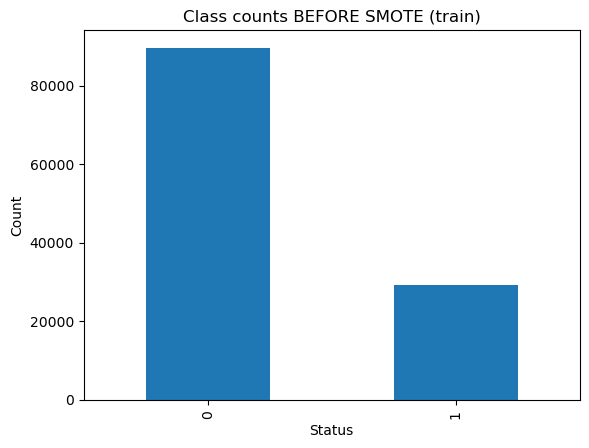

In [351]:
plt.figure()
pd.Series(y_train).value_counts().sort_index().plot(kind="bar")
plt.title("Class counts BEFORE SMOTE (train)")
plt.xlabel("Status"); plt.ylabel("Count")
plt.show()
file_name = f"class_SMOTE_barplot.png"
plt.savefig(os.path.join(save_path, file_name), bbox_inches="tight")
plt.close()   # close figure to avoid overlap in loop

In [352]:
sm = SMOTE(random_state=42, k_neighbors=5)   # reduce to 3 if very few minority samples
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [353]:
print("Train target counts AFTER  SMOTE:", Counter(y_train_sm))
print("X_train_sm shape:", X_train_sm.shape, "| X_test shape:", X_test.shape)

Train target counts AFTER  SMOTE: Counter({1: 89625, 0: 89625})
X_train_sm shape: (179250, 33) | X_test shape: (29694, 33)


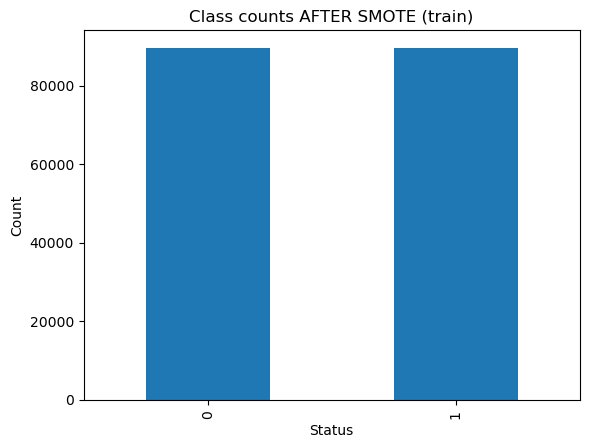

In [354]:
plt.figure()
pd.Series(y_train_sm).value_counts().sort_index().plot(kind="bar")
plt.title("Class counts AFTER SMOTE (train)")
plt.xlabel("Status"); plt.ylabel("Count")
plt.show()
file_name = f"class_after_SMOTE_barplot.png"
plt.savefig(os.path.join(save_path, file_name), bbox_inches="tight")
plt.close()   # close figure to avoid overlap in loop

In [355]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [356]:
print("Train shape:", X_train_sm.shape)
print("Test  shape:", X_test.shape)


Train shape: (179250, 33)
Test  shape: (29694, 33)


In [357]:
scaler = StandardScaler()

In [358]:
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled  = scaler.transform(X_test)

In [359]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_sm.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X_test.columns)

In [360]:
print("Train scaled preview:")
display(X_train_scaled.head())

Train scaled preview:


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,1.407239,0.0,-3.509585,1.469367,-0.309262,-0.491574,0.223437,-0.173036,-0.050779,0.501952,...,-1.075754,1.485268,0.900091,-0.994548,0.588991,0.775171,0.257575,1.195832,0.027958,0.510414
1,-0.896554,0.0,3.344551,-0.506937,-0.309262,1.199328,1.128343,-0.173036,-0.050779,-1.992223,...,-0.126248,-0.315474,0.790281,1.005482,1.278706,0.775171,0.524130,1.195832,0.027958,0.042796
2,0.344739,0.0,-0.082517,1.469367,-0.309262,-0.491574,0.223437,-0.173036,-0.050779,0.501952,...,-1.110282,-0.315474,-1.707903,-0.994548,1.278706,0.775171,-0.988405,1.195832,0.027958,0.978033
3,-1.230603,0.0,-0.082517,1.469367,-0.309262,-0.491574,0.223437,-0.173036,-0.050779,0.501952,...,-0.747743,-0.315474,-1.195455,1.005482,0.588991,0.775171,-1.197131,1.195832,0.027958,-0.307918
4,-0.315949,0.0,-0.082517,0.481215,-0.309262,-0.491574,-1.586374,-0.173036,-0.050779,0.501952,...,0.288081,1.485268,-0.884326,-0.994548,-1.480152,-1.290039,1.004738,-0.993229,0.027958,-0.775537


In [361]:

print("Test scaled preview:")
display(X_test_scaled.head())

Test scaled preview:


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,-1.158048,0.0,-0.082517,-0.506937,-0.309262,-0.491574,0.223437,-0.173036,-0.050779,0.501952,...,1.462016,0.584897,-0.582348,1.005482,-0.100723,0.775171,0.069433,-0.993229,0.027958,0.042796
1,-1.624444,0.0,-0.082517,0.481215,-0.309262,-0.491574,0.223437,-0.173036,-0.050779,0.501952,...,-0.747743,-1.215845,-1.607244,-0.994548,0.588991,0.775171,0.443889,-0.993229,0.027958,-0.892442
2,0.448453,0.0,-0.082517,1.469367,-0.309262,-0.491574,1.128343,-0.173036,-0.050779,0.501952,...,1.824554,-0.315474,0.049061,1.005482,-0.790438,0.775171,-0.753735,1.195832,0.027958,-2.178394
3,-0.105178,0.0,-0.082517,1.469367,-0.309262,-0.491574,1.128343,-0.173036,-0.050779,0.501952,...,-0.333413,1.485268,1.668763,1.005482,-0.790438,0.775171,-0.168664,1.195832,0.027958,-0.307918
4,-1.313537,0.0,-0.082517,-0.506937,-0.309262,-0.491574,1.128343,-0.173036,-0.050779,0.501952,...,2.515104,-1.215845,-0.765365,1.005482,-0.100723,-1.290039,-0.933617,-0.993229,0.027958,-1.009347


In [362]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [363]:
feature_names = list(X_train_scaled.columns)

print("Train shape:", X_train_scaled.shape, " | Test shape:", X_test_scaled.shape)
print("Target balance (train):")
print(pd.Series(y_train_sm).value_counts())

Train shape: (179250, 33)  | Test shape: (29694, 33)
Target balance (train):
Status
1    89625
0    89625
Name: count, dtype: int64


In [364]:
if not isinstance(X_train_scaled, pd.DataFrame):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_sm.columns)
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [365]:
feature_names = X_train_scaled.columns.tolist()


In [366]:
rf = RandomForestClassifier(
    n_estimators=500, max_depth=None, random_state=42, n_jobs=-1
)
rf.fit(X_train_scaled, y_train_sm)


RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [367]:
imp_rf = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)


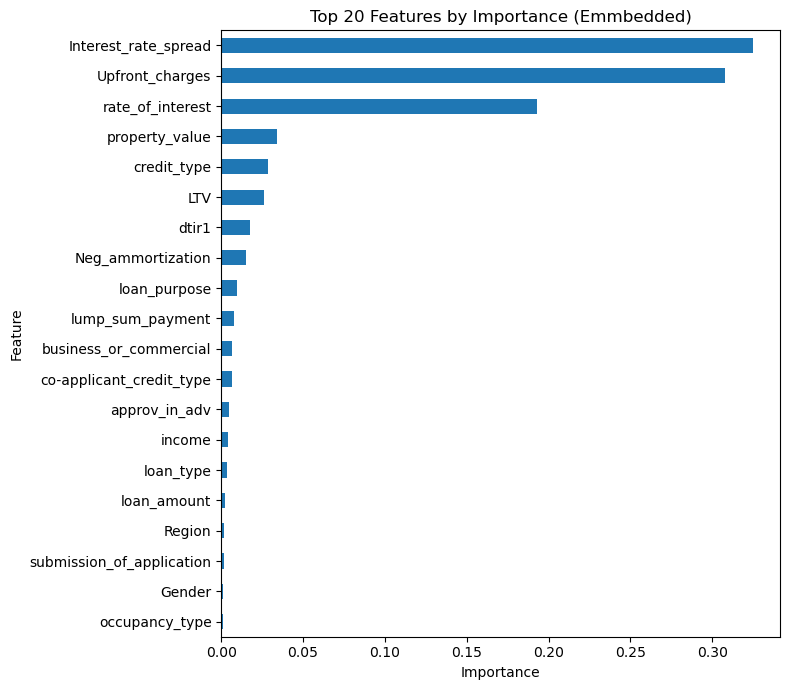

In [368]:
top_n = 20 
plt.figure(figsize=(8, max(4, top_n*0.35)))
imp_rf.head(top_n)[::-1].plot(kind="barh")
plt.title(f"Top {top_n} Features by Importance (Emmbedded)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
file_name = f"importence.png"
plt.savefig(os.path.join(save_path, file_name), bbox_inches="tight")
plt.close()   # close figure to avoid overlap in loop

In [369]:
import pandas as pd
from sklearn.utils import resample

- Random Oversampling (duplicate minority class)

In [370]:
import pandas as pd
from sklearn.utils import resample

In [371]:
# Split majority and minority classes
df_majority = df1[df1["Status"] == 1]
df_minority = df1[df1["Status"] == 0]

In [372]:
# Upsample minority
df_minority_upsampled = resample(
    df_minority,
    replace=True,              # sample with replacement
    n_samples=len(df_majority),# match majority count
    random_state=42
)

In [373]:
# Combine back
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [374]:
print("Class counts after upsampling:")
print(df_upsampled["Status"].value_counts())

Class counts after upsampling:
Status
1    36439
0    36439
Name: count, dtype: int64


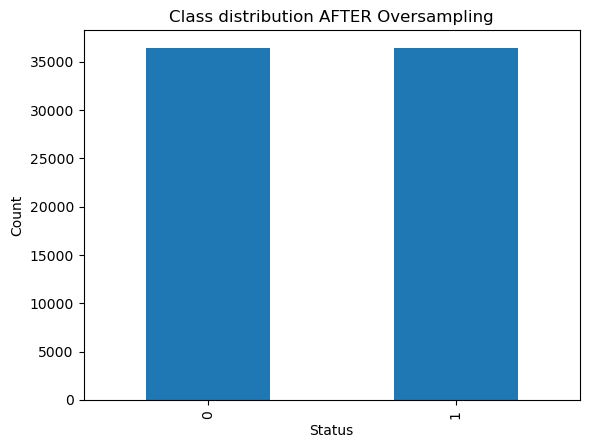

In [375]:
plt.figure()
df_upsampled["Status"].value_counts().sort_index().plot(kind="bar")
plt.title("Class distribution AFTER Oversampling")
plt.xlabel("Status"); plt.ylabel("Count")
plt.show()
file_name = f"oversample_barplot.png"
plt.savefig(os.path.join(save_path, file_name), bbox_inches="tight")
plt.close()   # close figure to avoid overlap in loop

- Random Undersampling (reduce majority class)

In [376]:
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [377]:
class_counts = df["Status"].value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

df_majority = df[df["Status"] == majority_class]
df_minority = df[df["Status"] == minority_class]

In [378]:
print("Majority class:", majority_class, "size:", len(df_majority))
print("Minority class:", minority_class, "size:", len(df_minority))

Majority class: 0 size: 112031
Minority class: 1 size: 36439


In [379]:
# Downsample majority to match minority
df_majority_downsampled = resample(
    df_majority,
    replace=False,                 
    n_samples=len(df_minority),    
    random_state=42
)


In [380]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])


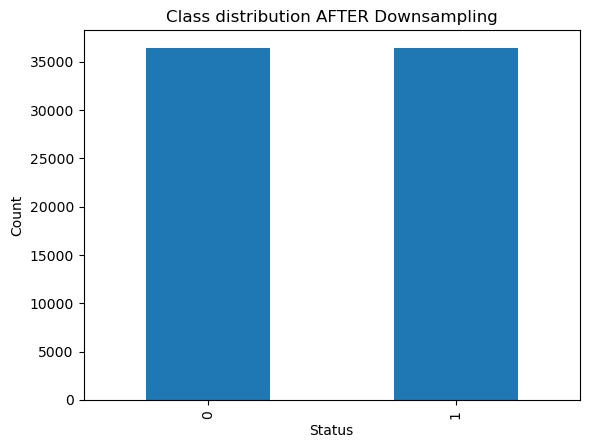

In [381]:
plt.figure()
df_downsampled["Status"].value_counts().sort_index().plot(kind="bar")
plt.title("Class distribution AFTER Downsampling")
plt.xlabel("Status"); plt.ylabel("Count")
plt.show()
file_name = f"under_sample_barplot.png"
plt.savefig(os.path.join(save_path, file_name), bbox_inches="tight")
plt.close() 

In [383]:
save_path_2 = './results/outputs'
# Resample
df_downsampled.to_csv(os.path.join(save_path_2, "df_downsampled.csv"), index=False)
df_upsampled.to_csv(os.path.join(save_path_2, "df_upsampled.csv"), index=False)

# SMOTE
X_train_sm.to_csv(os.path.join(save_path_2, "X_train_sm.csv"), index=False)
y_train_sm.to_csv(os.path.join(save_path_2, "y_train_sm.csv"), index=False)
